# 강준구 데이터 분석 프로젝트

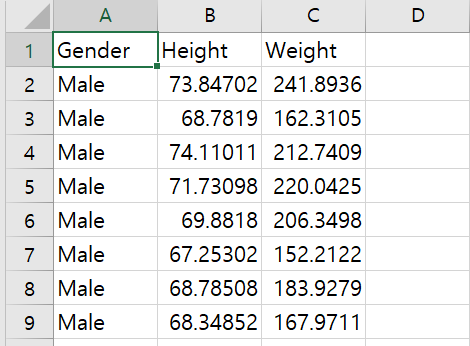

# 1.데이터 소개
10000명의 서로다른 성별과 키, 몸무게 데이터입니다.   
이러한 데이터를 활용하여 BMI를 계산하고 그에따른 분포도를 시각화해 의미를 도출합니다.   
## 최종 목표 
1. 키와 몸무게 분포도 분석 및 의미 도출
2. 성별에 따라 BMI지수는 어떻게 분포하는지 분석 및 의미도출
3. 인공지능 키와 몸무게, BMI지수만을 가지고 성별을 맞추기

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
import matplotlib.font_manager as fm
font_path = r'C:\Windows\Fonts\batang.ttc'
fontprop = fm.FontProperties(fname=font_path, size=18)

In [3]:
df=pd.read_csv('weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


# 2. 데이터 전처리

 1) Inch는 cm로, Found는 Kg으로 바꾸어 보기 편하게 바꾸어 주었습니다.

In [4]:
df.Weight /= 2.2046
df.Height *= 2.54
df.head()

,Gender,Height,Weight
0,Male,187.571423,109.722200
1,Male,174.706036,73.623547
2,Male,188.239668,96.498619
3,Male,182.196685,99.810610
4,Male,177.499761,93.599656


2) BMI 열도 추가해 주겠습니다. BMI 공식은 다음과 같습니다.
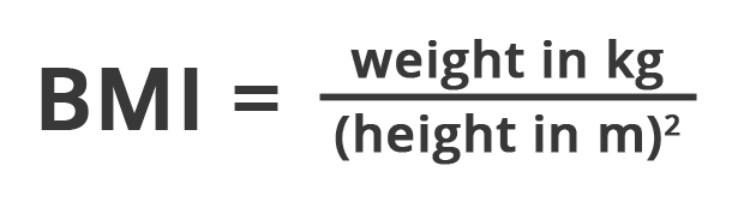

In [5]:
df["BMI"]=df['Weight']/((df['Height']/100)**2)
df.head()

,Gender,Height,Weight,BMI
0,Male,187.571423,109.722200,31.186107
1,Male,174.706036,73.623547,24.121312
2,Male,188.239668,96.498619,27.233208
3,Male,182.196685,99.810610,30.067392
4,Male,177.499761,93.599656,29.708362


3) 데이터에 결측치가 있는지 확인해 보겠습니다. 없으므로 바로 넘어가겠습니다.


In [6]:
df.isna().sum()

Gender    0
Height    0
Weight    0
BMI       0
dtype: int64

4) 메모리를 확인해보겠습니다. 절약할 수 있는건 절약하겠습니다.

In [7]:
df.memory_usage(deep=True)

Index        128
Gender    620000
Height     80000
Weight     80000
BMI        80000
dtype: int64

 현재 메모리 크기가 312.6 KB가 넘습니다.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
 3   BMI     10000 non-null  float64
dtypes: float64(3), object(1)
memory usage: 312.6+ KB


Gender는 굳이 Object일 필요가 없으니 category로, 키와 몸무게, BMI가 255가 넘을일은 없겠죠? uint8로 바꾸어줍니다.

In [9]:
df['Gender']=df['Gender'].astype('category')
df['Height']=df['Height'].astype(np.uint8)
df['Weight']=df['Weight'].astype(np.uint8)
df['BMI']=df['BMI'].astype(np.uint8)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Gender  10000 non-null  category
 1   Height  10000 non-null  uint8   
 2   Weight  10000 non-null  uint8   
 3   BMI     10000 non-null  uint8   
dtypes: category(1), uint8(3)
memory usage: 39.3 KB


총 데이터가 12.5%로 감소하였습니다

In [11]:
print(39.3/312.6)

0.1257197696737044


# 3. 데이터 분석 및 시각화 
이제 본격적으로 분석을 시작하겠습니다. 먼저 전체 키와 몸무게의 히스토그램을 통해 분포를 보겠습니다.

C:\Users\rkdwn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '키 히스토그램')

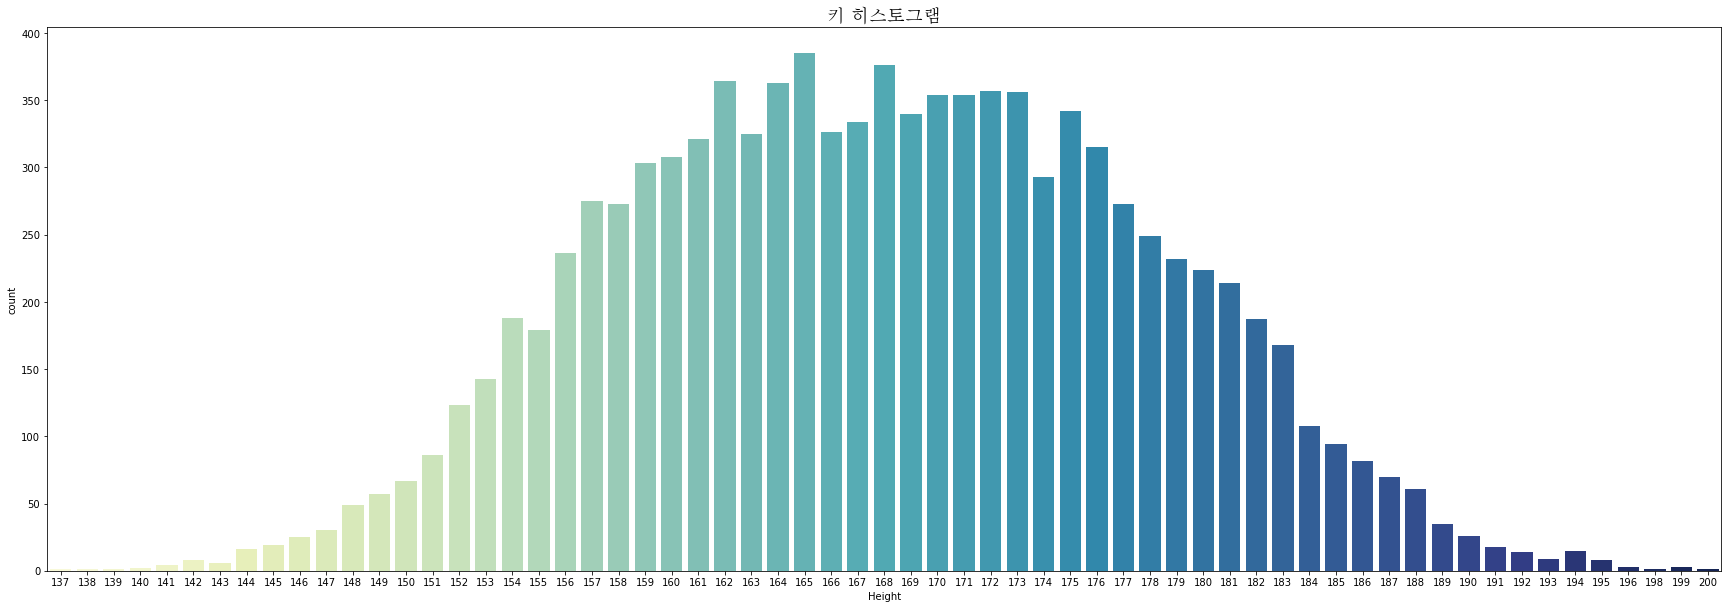

In [12]:
plt.rcParams['figure.figsize'] = (30, 10)
sns.countplot(df['Height'], palette='YlGnBu')
ax = plt.gca()
ax.set_title("키 히스토그램",fontproperties=fontprop)

C:\Users\rkdwn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '몸무게 히스토그램')

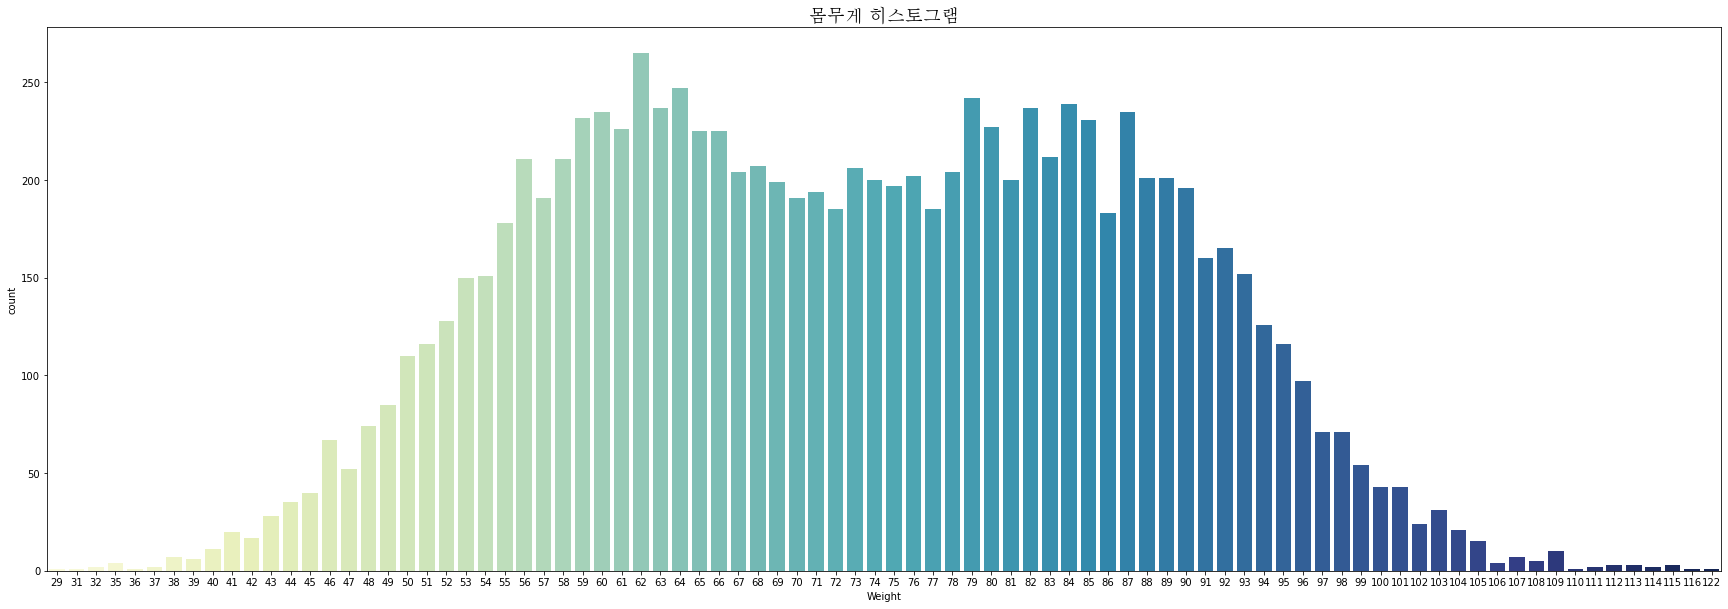

In [13]:
plt.rcParams['figure.figsize'] = (30, 10)
sns.countplot(df['Weight'], palette='YlGnBu')
ax = plt.gca()
ax.set_title("몸무게 히스토그램",fontproperties=fontprop)

  
오른쪽으로 갈수록 큰키와 높은 몸무게입니다. 키의 경우 모자와 같은 형태를 띄우나, 몸무게는 낙타 등모양입니다.  
아마도 몸무게의 경우 두 변곡점 부분이 여성과 남성이 몰리지 않았을까 예측해봅니다.

BMI지수 히스토그램입니다. 현재 이 데이터는 한국데이터가 아니므로 세계보건기구 기준에 따르겠습니다. 
27에 가장 많이 분포하므로 과체중이 가장 많이 있음을 알 수 있습니다.

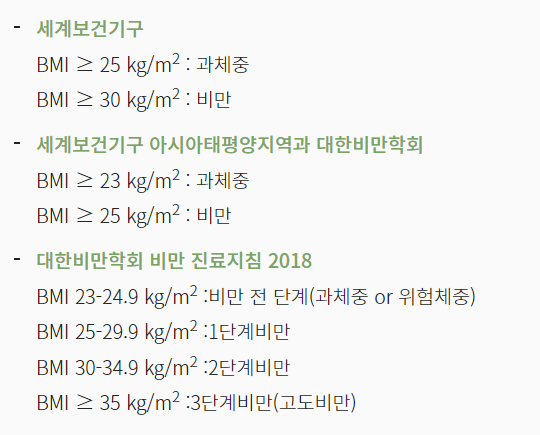

C:\Users\rkdwn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'BMI 지수')

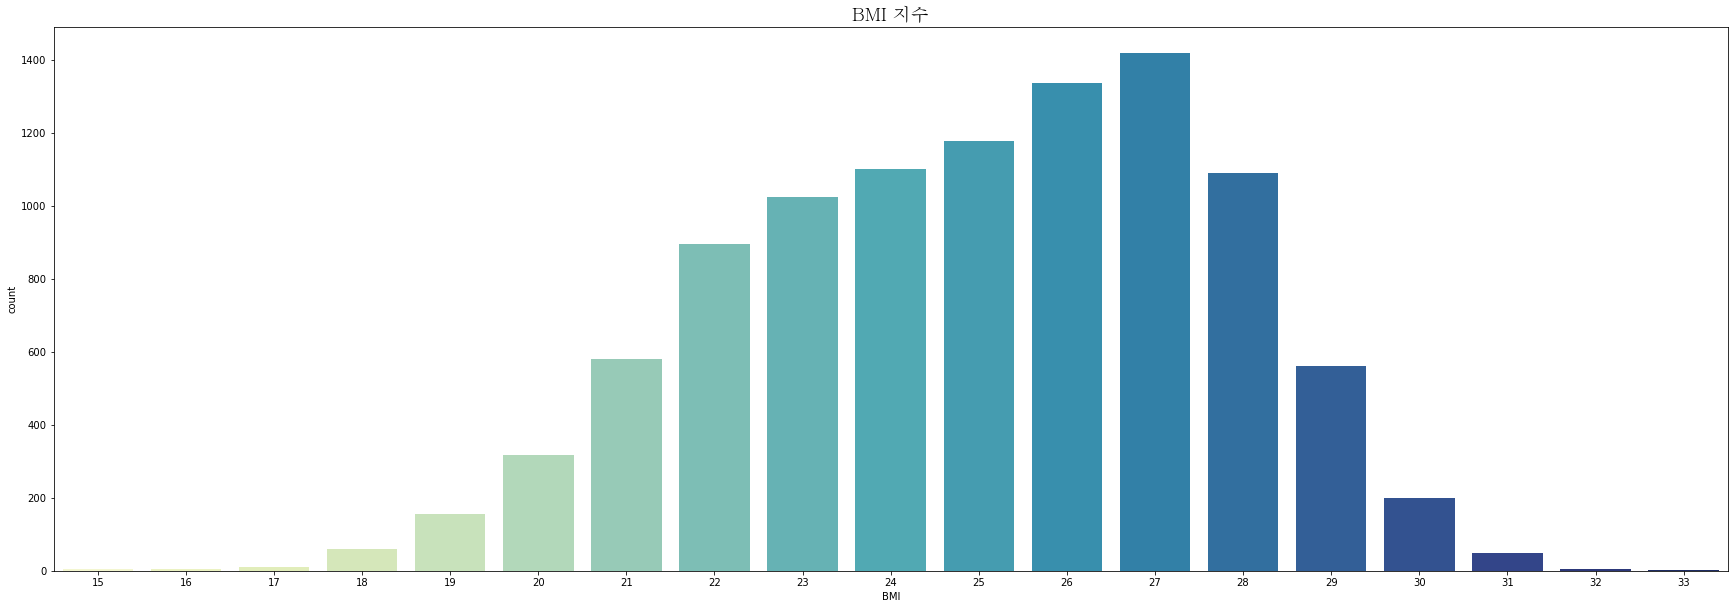

In [14]:
plt.rcParams['figure.figsize'] = (30, 10)
sns.countplot(df['BMI'], palette='YlGnBu')
#plt.xticks(rotation=45)
ax = plt.gca()
ax.set_title("BMI 지수",fontproperties=fontprop)

평균이 약 25, 표준편차는 2.7이므로 대부분 BMI는 22~28 사이정도에 분포해 있습니다.

In [15]:
df.describe()

,Height,Weight,BMI
count,10000.000000,10000.0000,10000.000000
mean,168.073300,72.7347,24.976800
std,9.775269,14.5725,2.709058
min,137.000000,29.0000,15.000000
25%,161.000000,61.0000,23.000000
50%,168.000000,73.0000,25.000000
75%,175.000000,84.0000,27.000000
max,200.000000,122.0000,33.000000


몸무게는 100K대에 많이 몰려있고, 키는 180정도에 몰려있음을 알 수 있습니다.

* 파란색은 몸무게, 주황색은 키

<AxesSubplot:xlabel='Weight', ylabel='Density'>

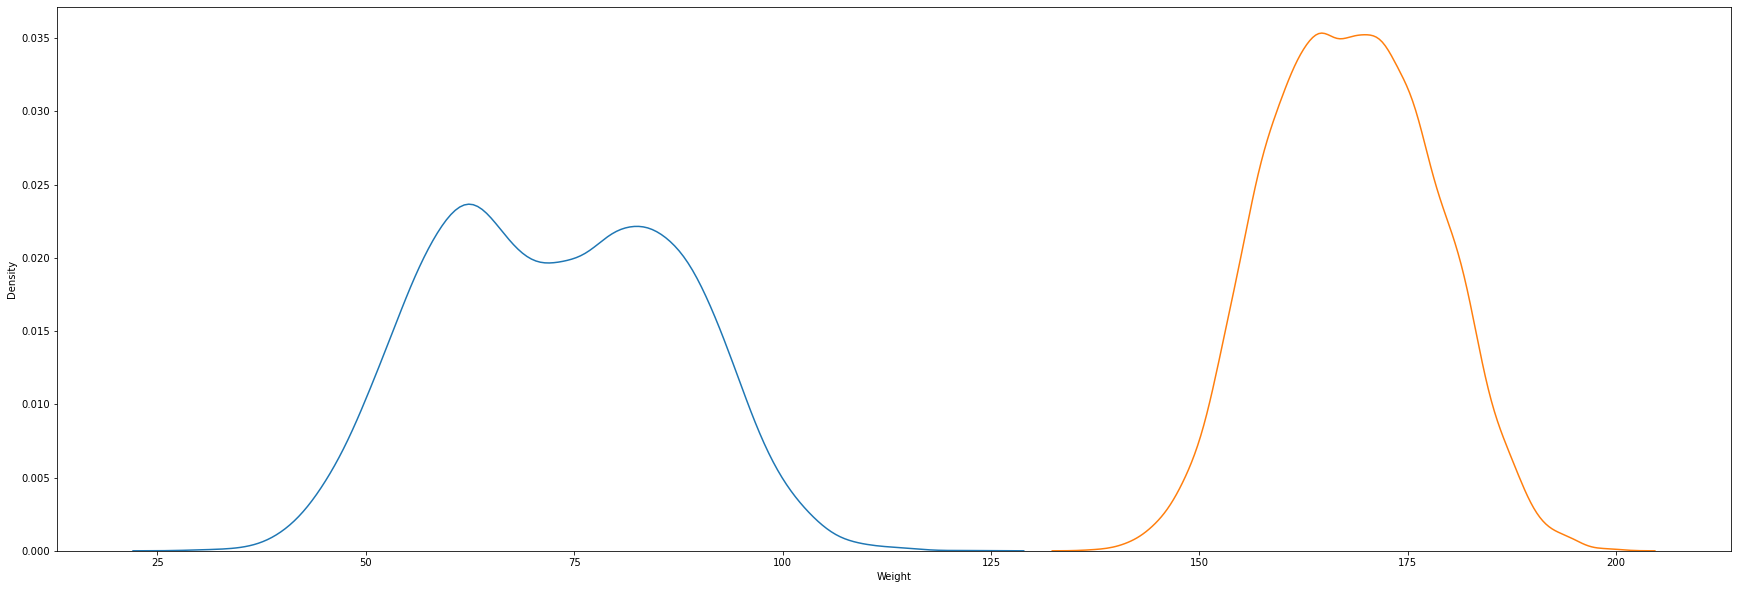

In [16]:
sns.kdeplot(df.Weight)
sns.kdeplot(df.Height)

## 이것을 한눈에 보면 다음과 같습니다.
몸무게가 증가할수록 BMI도 증가하는 양상을 보이며, 키가 증가할수록 역시 몸무게가 증가함을 알 수 있습니다.

C:\Users\rkdwn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\rkdwn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


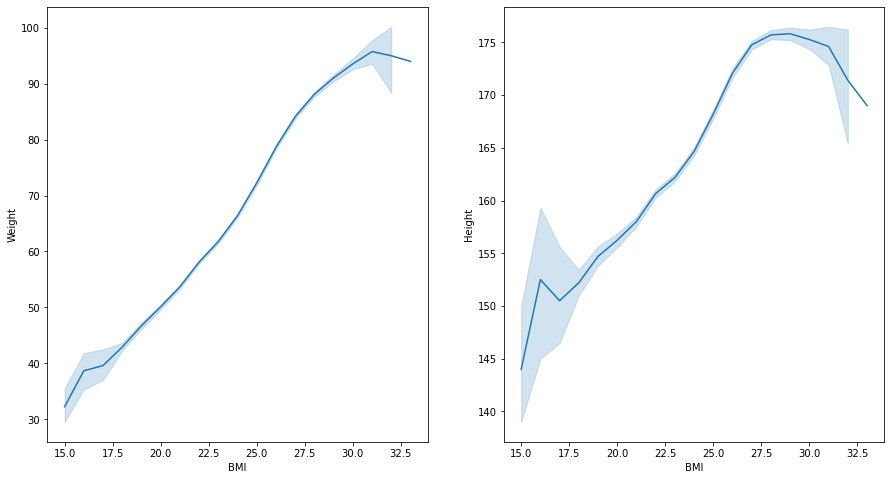

In [17]:
fig, ax= plt.subplots(1,2, figsize=(15,8))
sns.lineplot(df['BMI'],df['Weight'], ax=ax[0])
sns.lineplot(df['BMI'],df['Height'], ax=ax[1])
plt.show()

* 이제 남성과 여성을 나누어 BMI 지수를 분석해 보겠습니다. 

이전(위) 그래프에서 볼 수 있든 키, 몸무게가 증가할수록 BMI지수가 높았습니다.(점차 비만에 가까워진다는 뜻) 
평균적으로 여성보다 남성이 키와 몸무게가 크니 BMI지수역시 남성이 더 높음을 알 수 있습니다.(주황색)

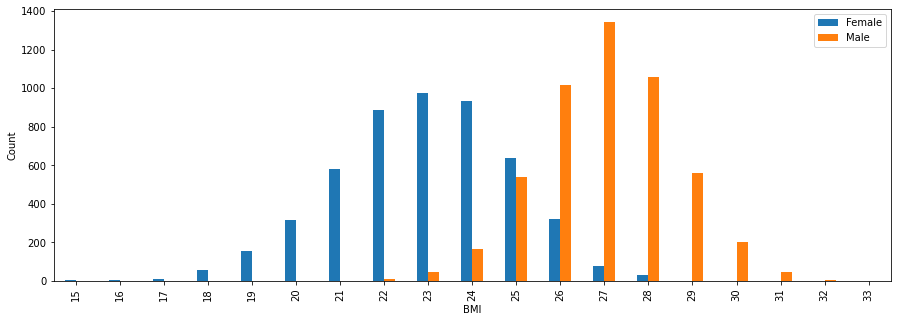

In [18]:
tab = pd.crosstab(index=df['BMI'], columns=df['Gender'])
tab.plot(kind="bar", stacked=False, figsize=(15,5))
plt.xlabel('BMI')
plt.ylabel('Count')
plt.legend()
plt.show()

키와 몸무게에 따른 남성과 여성 분포도 입니다. (남성 : 파란색, 여성 : 빨간색)

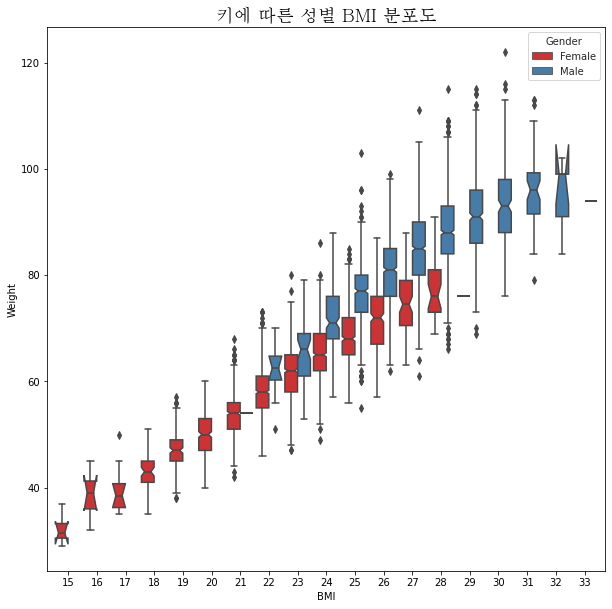

In [19]:
fig,ax = plt.subplots(figsize=(10, 10))
with sns.axes_style("white"):
    sns.boxplot(data=df,x='BMI',y='Weight',hue='Gender',palette="Set1",notch=True,width=.9)
   
    plt.title("키에 따른 성별 BMI 분포도",fontproperties=fontprop)
    plt.plot()

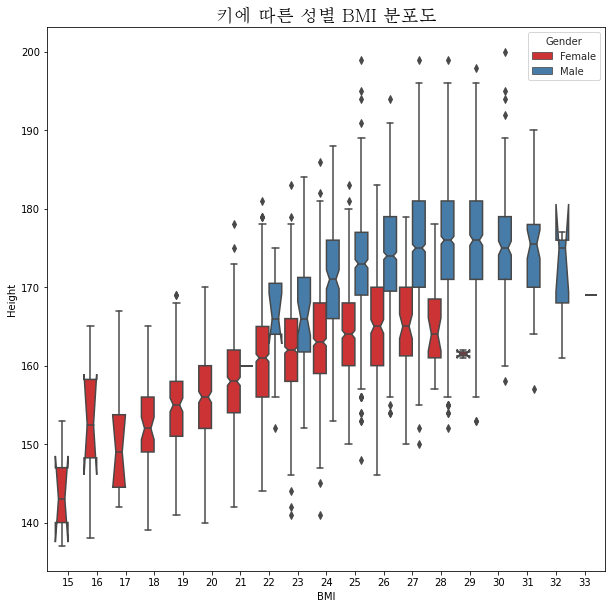

In [20]:
fig,ax = plt.subplots(figsize=(10, 10))
with sns.axes_style("white"):
    sns.boxplot(data=df,x='BMI',y='Height',hue='Gender',palette="Set1",notch=True,width=.9)
    plt.title("키에 따른 성별 BMI 분포도",fontproperties=fontprop)
    plt.plot()

# 4. 의미 도출
지금까지 분석한 결과를 보아 BMI지수에는 성별간의 확연한 차이가 보입니다.

C:\Users\rkdwn\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\rkdwn\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 37.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\rkdwn\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 56.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\rkdwn\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 68.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\rkdwn\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 68.0% of the points

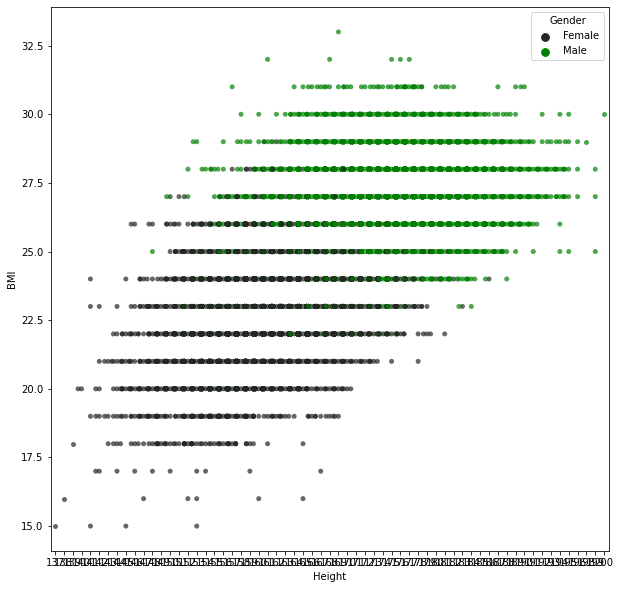

In [21]:
fig=plt.subplots(figsize=(10,10))
#sns.violinplot(data=df,y="BMI",x="Health",hue="Gender",color="Red")
sns.swarmplot(data=df,x='Height',y='BMI',hue='Gender',color="Green",alpha=.7) #투명도
plt.show()

이번엔 키와 몸무게를 한꺼번에 남녀 나누어서 확인해 보겠습니다.  
한번더 리마인드해보겠습니다.  
#### 키와 몸무게는 아래 분포도 처럼 차이가 남을 알고있었지만 BMI도 역시 다른 결과를 갖는다는 것을 알게되었습니다.

Text(0.5, 1.0, '성별에 따른 키,몸무게 분포도')

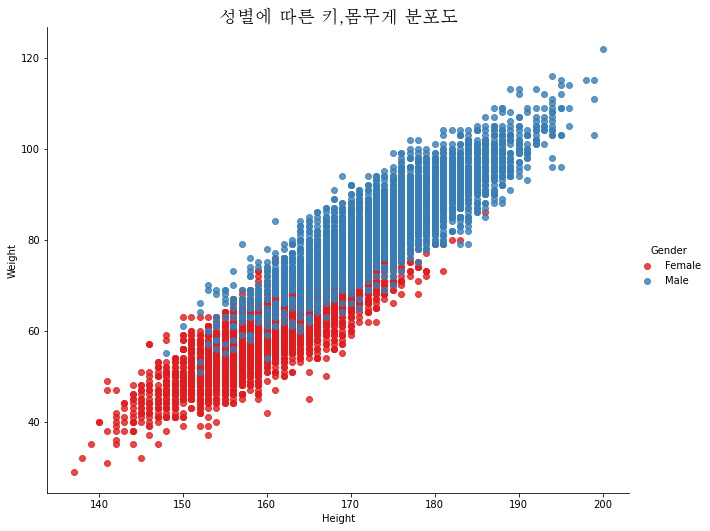

In [22]:
# Trend in Gender based on relationship between Height and Weight
sns.lmplot(x='Height', y='Weight', hue='Gender', data=df,
           fit_reg=False, height=7, aspect=1.25, palette = "Set1")
ax = plt.gca()
ax.set_title("성별에 따른 키,몸무게 분포도",fontproperties=fontprop)

그래도 정확하게 봐야하니 남성과 여성을 나눠서 수치로 확인해 보겠습니다.

In [23]:
male_data = df[df['Gender']=='Male']
female_data = df[df['Gender']=='Female']

#### 남성의 경우 키와 BMI지수는 상관관계가 낮고 몸무게와 높음을 알 수 있습니다.

<AxesSubplot:>

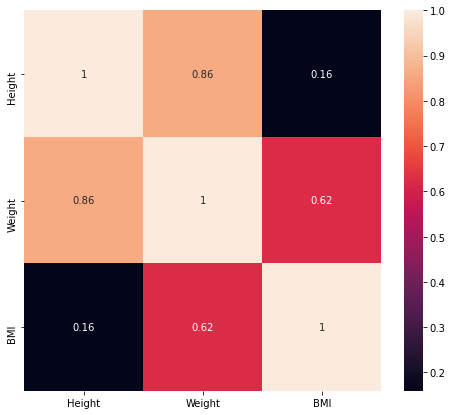

In [24]:
plt.rcParams['figure.figsize'] = (8, 7)
sns.heatmap(male_data.corr(), annot=True)

#### 이와 달리 여성의 경우 남성보다 키와 몸무게에서 모두 상관관계가 높습니다.

<AxesSubplot:>

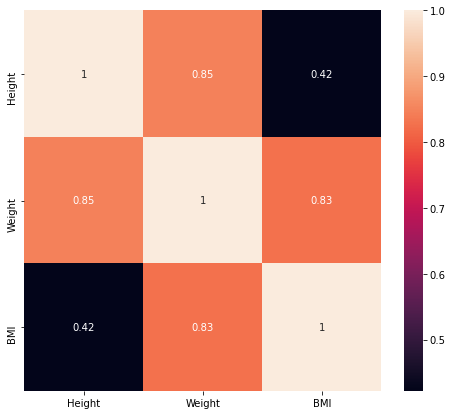

In [25]:
plt.rcParams['figure.figsize'] = (8, 7)
sns.heatmap(female_data.corr(), annot=True)

그렇다면 키와 몸무게, BMI지수만 입력해가지고 남성일지 여성일지도 알 수 있을 것 같습니다.

이걸로 **딥러닝모델** 한번 만들어 보겠습니다. 키 몸무게 BMI지수만을 가지고 한번 남성일지 여성일지 맞추어 보겠습니다..

# 5. 인공지능(딥러닝) 데이터 전처리
남자는 1, 여자는 0, 그리고 Health는 초기의 0~5로 되돌려 놓겠습니다.

In [26]:
df["Gender"] = df["Gender"].astype('category')
df["Gender"] = df["Gender"].cat.codes
df.head()

,Gender,Height,Weight,BMI
0,1,187,109,31
1,1,174,73,24
2,1,188,96,27
3,1,182,99,30
4,1,177,93,29


딥러닝 모델을 만들기 위해 텐서플러우를 import 해주겠습니다.

In [27]:
import tensorflow as tf

y 데이터인 정답에는 성별을 넣습니다. 

In [28]:
yData=df['Gender'].values 
print(yData)

[1 1 1 ... 0 0 0]


x 데이터에 키, 몸무게, BMI를 넣고 학습을 시켜보겠습니다.

In [29]:
xData=[]
for i,rows in df.iterrows():
    xData.append([rows['Height'],rows['Weight'],rows['BMI']])

여기서 Sequential을 쓰면 신경망 레이어들을 쉽게 만들 수 있습니다.

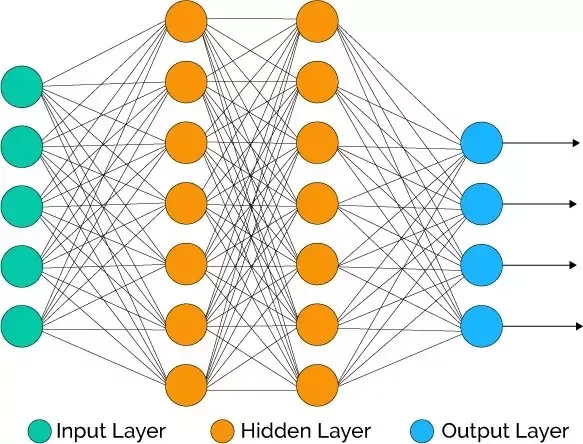

각각의 레이어의 64와 128, 활성함수는 **tanh**를 넣었습니다. 마지막 노드에는 활성함수로 **sigmoid**를 넣었습니다.   
컴파일 할땐  Optimizer에는 **Adam**을, Loss에는 **Binary crossentropy**, Metrics에는 **Accuracy**를 넣어줍니다.   
x엔 **학습데이터**를 y엔 **정답**을 넣어주고 Epoch는 **1000회**를 넣었습니다.

In [30]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Dense(64,activation='tanh'),
    tf.keras.layers.Dense(128,activation='tanh'),
    tf.keras.layers.Dense(1,activation='sigmoid'),
])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.fit(np.array(xData),np.array(yData),epochs=1000)

Epoch 1/1000
313/313 [==============================] - 1s 1ms/step - loss: 0.3575 - accuracy: 0.8412
Epoch 2/1000
313/313 [==============================] - 0s 962us/step - loss: 0.2242 - accuracy: 0.9118
Epoch 3/1000
313/313 [==============================] - 0s 894us/step - loss: 0.2281 - accuracy: 0.9143
Epoch 4/1000
313/313 [==============================] - 0s 926us/step - loss: 0.2152 - accuracy: 0.9173
Epoch 5/1000
313/313 [==============================] - 0s 917us/step - loss: 0.2253 - accuracy: 0.9115
Epoch 6/1000
313/313 [==============================] - 0s 1ms/step - loss: 0.2263 - accuracy: 0.9115
Epoch 7/1000
313/313 [==============================] - 0s 1ms/step - loss: 0.2250 - accuracy: 0.9083
Epoch 8/1000
313/313 [==============================] - 0s 981us/step - loss: 0.2279 - accuracy: 0.9107
Epoch 9/1000
313/313 [==============================] - 0s 1ms/step - loss: 0.2264 - accuracy: 0.9108
Epoch 10/1000
313/313 [==============================] - 0s 943us/step -

313/313 [==============================] - 0s 943us/step - loss: 0.2178 - accuracy: 0.9169
Epoch 80/1000
313/313 [==============================] - 0s 949us/step - loss: 0.2189 - accuracy: 0.9136
Epoch 81/1000
313/313 [==============================] - 0s 1ms/step - loss: 0.2121 - accuracy: 0.9183
Epoch 82/1000
313/313 [==============================] - 0s 930us/step - loss: 0.2146 - accuracy: 0.9174
Epoch 83/1000
313/313 [==============================] - 0s 965us/step - loss: 0.2193 - accuracy: 0.9123
Epoch 84/1000
313/313 [==============================] - 0s 955us/step - loss: 0.2258 - accuracy: 0.9117
Epoch 85/1000
313/313 [==============================] - 0s 1ms/step - loss: 0.2186 - accuracy: 0.9134
Epoch 86/1000
313/313 [==============================] - 0s 1ms/step - loss: 0.2191 - accuracy: 0.9139
Epoch 87/1000
313/313 [==============================] - 0s 971us/step - loss: 0.2216 - accuracy: 0.9158
Epoch 88/1000
313/313 [==============================] - 0s 939us/step - lo

Epoch 157/1000
313/313 [==============================] - 0s 981us/step - loss: 0.2204 - accuracy: 0.9114
Epoch 158/1000
313/313 [==============================] - 0s 1ms/step - loss: 0.2240 - accuracy: 0.9123
Epoch 159/1000
313/313 [==============================] - 0s 1ms/step - loss: 0.2144 - accuracy: 0.9149
Epoch 160/1000
313/313 [==============================] - 0s 987us/step - loss: 0.2110 - accuracy: 0.9193
Epoch 161/1000
313/313 [==============================] - 0s 930us/step - loss: 0.2143 - accuracy: 0.9132
Epoch 162/1000
313/313 [==============================] - 0s 1ms/step - loss: 0.2139 - accuracy: 0.9191
Epoch 163/1000
313/313 [==============================] - 0s 991us/step - loss: 0.2147 - accuracy: 0.9134
Epoch 164/1000
313/313 [==============================] - 0s 1ms/step - loss: 0.2174 - accuracy: 0.9152
Epoch 165/1000
313/313 [==============================] - 0s 1ms/step - loss: 0.2125 - accuracy: 0.9182
Epoch 166/1000
313/313 [==============================] 

313/313 [==============================] - 0s 888us/step - loss: 0.2206 - accuracy: 0.9131
Epoch 235/1000
313/313 [==============================] - 0s 926us/step - loss: 0.2140 - accuracy: 0.9170
Epoch 236/1000
313/313 [==============================] - 0s 946us/step - loss: 0.2165 - accuracy: 0.9152
Epoch 237/1000
313/313 [==============================] - 0s 975us/step - loss: 0.2128 - accuracy: 0.9165
Epoch 238/1000
313/313 [==============================] - 0s 1ms/step - loss: 0.2024 - accuracy: 0.9199
Epoch 239/1000
313/313 [==============================] - 0s 1ms/step - loss: 0.2304 - accuracy: 0.9077
Epoch 240/1000
313/313 [==============================] - 0s 1ms/step - loss: 0.2295 - accuracy: 0.9112
Epoch 241/1000
313/313 [==============================] - 0s 904us/step - loss: 0.2260 - accuracy: 0.9123
Epoch 242/1000
313/313 [==============================] - 0s 936us/step - loss: 0.2079 - accuracy: 0.9185
Epoch 243/1000
313/313 [==============================] - 0s 946us/

313/313 [==============================] - 0s 943us/step - loss: 0.2202 - accuracy: 0.9139
Epoch 312/1000
313/313 [==============================] - 0s 882us/step - loss: 0.2184 - accuracy: 0.9108
Epoch 313/1000
313/313 [==============================] - 0s 910us/step - loss: 0.2177 - accuracy: 0.9109
Epoch 314/1000
313/313 [==============================] - 0s 910us/step - loss: 0.2154 - accuracy: 0.9144
Epoch 315/1000
313/313 [==============================] - 0s 914us/step - loss: 0.2253 - accuracy: 0.9094
Epoch 316/1000
313/313 [==============================] - 0s 914us/step - loss: 0.2195 - accuracy: 0.9188
Epoch 317/1000
313/313 [==============================] - 0s 885us/step - loss: 0.2134 - accuracy: 0.9214
Epoch 318/1000
313/313 [==============================] - 0s 910us/step - loss: 0.2164 - accuracy: 0.9163
Epoch 319/1000
313/313 [==============================] - 0s 959us/step - loss: 0.2236 - accuracy: 0.9124
Epoch 320/1000
313/313 [==============================] - 0s 

313/313 [==============================] - 0s 1ms/step - loss: 0.2144 - accuracy: 0.9176
Epoch 389/1000
313/313 [==============================] - 0s 888us/step - loss: 0.2154 - accuracy: 0.9163
Epoch 390/1000
313/313 [==============================] - 0s 971us/step - loss: 0.2240 - accuracy: 0.9109
Epoch 391/1000
313/313 [==============================] - 0s 975us/step - loss: 0.2110 - accuracy: 0.9189
Epoch 392/1000
313/313 [==============================] - 0s 997us/step - loss: 0.2162 - accuracy: 0.9154
Epoch 393/1000
313/313 [==============================] - 0s 898us/step - loss: 0.2168 - accuracy: 0.9121
Epoch 394/1000
313/313 [==============================] - 0s 882us/step - loss: 0.2200 - accuracy: 0.9121
Epoch 395/1000
313/313 [==============================] - 0s 930us/step - loss: 0.2254 - accuracy: 0.9134
Epoch 396/1000
313/313 [==============================] - 0s 1ms/step - loss: 0.2179 - accuracy: 0.9139
Epoch 397/1000
313/313 [==============================] - 0s 1ms/

313/313 [==============================] - 0s 920us/step - loss: 0.2199 - accuracy: 0.9115
Epoch 466/1000
313/313 [==============================] - 0s 914us/step - loss: 0.2279 - accuracy: 0.9123
Epoch 467/1000
313/313 [==============================] - 0s 907us/step - loss: 0.2208 - accuracy: 0.9122
Epoch 468/1000
313/313 [==============================] - 0s 1ms/step - loss: 0.2076 - accuracy: 0.9184
Epoch 469/1000
313/313 [==============================] - 0s 878us/step - loss: 0.2048 - accuracy: 0.9209
Epoch 470/1000
313/313 [==============================] - 0s 959us/step - loss: 0.2156 - accuracy: 0.9157
Epoch 471/1000
313/313 [==============================] - 0s 991us/step - loss: 0.2153 - accuracy: 0.9171
Epoch 472/1000
313/313 [==============================] - 0s 991us/step - loss: 0.2072 - accuracy: 0.9192
Epoch 473/1000
313/313 [==============================] - 0s 946us/step - loss: 0.2149 - accuracy: 0.9151
Epoch 474/1000
313/313 [==============================] - 0s 98

313/313 [==============================] - 0s 1ms/step - loss: 0.2129 - accuracy: 0.9188
Epoch 543/1000
313/313 [==============================] - 0s 926us/step - loss: 0.2209 - accuracy: 0.9137
Epoch 544/1000
313/313 [==============================] - 0s 894us/step - loss: 0.2185 - accuracy: 0.9110
Epoch 545/1000
313/313 [==============================] - 0s 926us/step - loss: 0.2152 - accuracy: 0.9167
Epoch 546/1000
313/313 [==============================] - 0s 936us/step - loss: 0.2139 - accuracy: 0.9170
Epoch 547/1000
313/313 [==============================] - 0s 914us/step - loss: 0.2165 - accuracy: 0.9154
Epoch 548/1000
313/313 [==============================] - 0s 949us/step - loss: 0.2115 - accuracy: 0.9179
Epoch 549/1000
313/313 [==============================] - 0s 917us/step - loss: 0.2117 - accuracy: 0.9226
Epoch 550/1000
313/313 [==============================] - 0s 933us/step - loss: 0.2123 - accuracy: 0.9153
Epoch 551/1000
313/313 [==============================] - 0s 91

313/313 [==============================] - 0s 875us/step - loss: 0.2187 - accuracy: 0.9158
Epoch 619/1000
313/313 [==============================] - 0s 1ms/step - loss: 0.2110 - accuracy: 0.9145
Epoch 620/1000
313/313 [==============================] - 0s 978us/step - loss: 0.2204 - accuracy: 0.9138
Epoch 621/1000
313/313 [==============================] - 0s 901us/step - loss: 0.2149 - accuracy: 0.9162
Epoch 622/1000
313/313 [==============================] - 0s 978us/step - loss: 0.2104 - accuracy: 0.9175
Epoch 623/1000
313/313 [==============================] - 0s 907us/step - loss: 0.2223 - accuracy: 0.9126
Epoch 624/1000
313/313 [==============================] - 0s 894us/step - loss: 0.2163 - accuracy: 0.9182
Epoch 625/1000
313/313 [==============================] - 0s 949us/step - loss: 0.2233 - accuracy: 0.9136
Epoch 626/1000
313/313 [==============================] - 0s 941us/step - loss: 0.2113 - accuracy: 0.9162
Epoch 627/1000
313/313 [==============================] - 0s 94

313/313 [==============================] - 0s 952us/step - loss: 0.2154 - accuracy: 0.9155
Epoch 696/1000
313/313 [==============================] - 0s 926us/step - loss: 0.2223 - accuracy: 0.9131
Epoch 697/1000
313/313 [==============================] - 0s 930us/step - loss: 0.2079 - accuracy: 0.9225
Epoch 698/1000
313/313 [==============================] - 0s 930us/step - loss: 0.2196 - accuracy: 0.9109
Epoch 699/1000
313/313 [==============================] - 0s 875us/step - loss: 0.2209 - accuracy: 0.9182
Epoch 700/1000
313/313 [==============================] - 0s 891us/step - loss: 0.2186 - accuracy: 0.9184
Epoch 701/1000
313/313 [==============================] - 0s 933us/step - loss: 0.2207 - accuracy: 0.91220s - loss: 0.2358 - accura
Epoch 702/1000
313/313 [==============================] - 0s 891us/step - loss: 0.2146 - accuracy: 0.9149
Epoch 703/1000
313/313 [==============================] - 0s 952us/step - loss: 0.2093 - accuracy: 0.9199
Epoch 704/1000
313/313 [===========

Epoch 772/1000
313/313 [==============================] - 0s 907us/step - loss: 0.2212 - accuracy: 0.9152
Epoch 773/1000
313/313 [==============================] - 0s 1ms/step - loss: 0.2129 - accuracy: 0.9203
Epoch 774/1000
313/313 [==============================] - 0s 1ms/step - loss: 0.2129 - accuracy: 0.9171
Epoch 775/1000
313/313 [==============================] - 0s 930us/step - loss: 0.2153 - accuracy: 0.9132
Epoch 776/1000
313/313 [==============================] - 0s 1ms/step - loss: 0.2244 - accuracy: 0.9123
Epoch 777/1000
313/313 [==============================] - 0s 1ms/step - loss: 0.2326 - accuracy: 0.9082
Epoch 778/1000
313/313 [==============================] - 0s 943us/step - loss: 0.2105 - accuracy: 0.9176
Epoch 779/1000
313/313 [==============================] - 0s 959us/step - loss: 0.2188 - accuracy: 0.9173
Epoch 780/1000
313/313 [==============================] - 0s 943us/step - loss: 0.2199 - accuracy: 0.9148
Epoch 781/1000
313/313 [==============================

313/313 [==============================] - 0s 1ms/step - loss: 0.2190 - accuracy: 0.9124
Epoch 850/1000
313/313 [==============================] - 0s 1ms/step - loss: 0.2134 - accuracy: 0.9164
Epoch 851/1000
313/313 [==============================] - 0s 1ms/step - loss: 0.2152 - accuracy: 0.9153
Epoch 852/1000
313/313 [==============================] - 0s 1ms/step - loss: 0.2152 - accuracy: 0.9119
Epoch 853/1000
313/313 [==============================] - 0s 1ms/step - loss: 0.2115 - accuracy: 0.9195
Epoch 854/1000
313/313 [==============================] - 0s 1ms/step - loss: 0.2032 - accuracy: 0.9258
Epoch 855/1000
313/313 [==============================] - 0s 1ms/step - loss: 0.2152 - accuracy: 0.9135
Epoch 856/1000
313/313 [==============================] - 0s 1ms/step - loss: 0.2126 - accuracy: 0.9150
Epoch 857/1000
313/313 [==============================] - 0s 1ms/step - loss: 0.2155 - accuracy: 0.9122
Epoch 858/1000
313/313 [==============================] - 0s 1ms/step - loss: 0

313/313 [==============================] - 0s 904us/step - loss: 0.2229 - accuracy: 0.9095
Epoch 928/1000
313/313 [==============================] - 0s 914us/step - loss: 0.2155 - accuracy: 0.9179
Epoch 929/1000
313/313 [==============================] - 0s 930us/step - loss: 0.2236 - accuracy: 0.9151
Epoch 930/1000
313/313 [==============================] - 0s 930us/step - loss: 0.2183 - accuracy: 0.9160
Epoch 931/1000
313/313 [==============================] - 0s 923us/step - loss: 0.2243 - accuracy: 0.9124
Epoch 932/1000
313/313 [==============================] - 0s 901us/step - loss: 0.2136 - accuracy: 0.9168
Epoch 933/1000
313/313 [==============================] - 0s 933us/step - loss: 0.2047 - accuracy: 0.9213
Epoch 934/1000
313/313 [==============================] - 0s 930us/step - loss: 0.2113 - accuracy: 0.9198
Epoch 935/1000
313/313 [==============================] - 0s 907us/step - loss: 0.2174 - accuracy: 0.9170
Epoch 936/1000
313/313 [==============================] - 0s 

In [31]:
predict =model.predict([[175,70,22]])
print(predict)

[[0.07452619]]


먼저 본인의 키와 몸무게를 넣어보았습니다. 0%에 가깝습니다.   
이 데이터는 외국데이터를 기반으로 학습한 모델이므로 저는 외국가면 여자입니다.  
살좀 찌워야겠습니다.

In [32]:
predict =model.predict([[175,90,24]])
print(predict)

[[0.99933374]]


20kg 벌크업을하고나니 드디어 외국나가서 남자취급을 받을 수 있습니다.

# 6. 어려웠던 점
양질의 데이터를 찾기가 어려웠습니다.
이전의 발표영상에서 사용했던 데이터는 양질의 데이터가 아니었을 뿐더러 데이터 개수도 500개 정도로 상당히 적었습니다.
따라서 딥러닝 모델을 만들때 정확도도 매우 떨어졌습니다.  

하지만 최종발표때에는 좀더 양질의 데이터를 구해 정확도도 올리고 시각화 하는데 더욱더 설득력을 높일 수 있었습니다.

감사합니다.